# But prise en main des objets créés par mes collègues et lancement d'un entrapînement à partir de la BDTOPO ou du RIL en tant que LAbel ??

In [29]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
! pip install rasterio  -q -q -q
! pip install geopandas -q -q -q
! pip install matplotlib -q -q -q

In [201]:
import sys
sys.path.append('../src')
from satellite_image import SatelliteImage
from utils import *


In [132]:
import yaml
import re
import s3fs
import numpy as np
import matplotlib.pyplot as plt

In [148]:
os.environ["AWS_ACCESS_KEY_ID"]="ZQUP3MQ45V25LYPYH1MC"
os.environ["AWS_SECRET_ACCESS_KEY"]="jFE8Cbio6Dt3dZvV5qbd9j3k9bGL6tDESjnxu4xm"
os.environ["AWS_S3_ENDPOINT"]='minio.lab.sspcloud.fr'
os.environ["AWS_SESSION_TOKEN"]="eyJhbGciOiJIUzUxMiIsInR5cCI6IkpXVCJ9.eyJhY2Nlc3NLZXkiOiJaUVVQM01RNDVWMjVMWVBZSDFNQyIsImFsbG93ZWQtb3JpZ2lucyI6WyIqIl0sImF1ZCI6WyJtaW5pby1kYXRhbm9kZSIsIm9ueXhpYSIsImFjY291bnQiXSwiYXV0aF90aW1lIjoxNjc4MTAxMjU5LCJhenAiOiJvbnl4aWEiLCJlbWFpbCI6ImNsZW1lbnQuZ3VpbGxvQGluc2VlLmZyIiwiZW1haWxfdmVyaWZpZWQiOnRydWUsImV4cCI6MTY3ODU0MjI1OCwiZmFtaWx5X25hbWUiOiJHdWlsbG8iLCJnaXZlbl9uYW1lIjoiQ2zDqW1lbnQiLCJncm91cHMiOlsiY2hhbGxlbmdlZGF0YS1lbnMiLCJmdW5hdGhvbiIsInNsdW1zLWRldGVjdGlvbiJdLCJpYXQiOjE2NzgxMDEyNjAsImlzcyI6Imh0dHBzOi8vYXV0aC5sYWIuc3NwY2xvdWQuZnIvYXV0aC9yZWFsbXMvc3NwY2xvdWQiLCJqdGkiOiIwZmVkMDQ2My0zMWQ3LTRlMDMtYjJjZS04MDhkNWEyOTI4ZjkiLCJsb2NhbGUiOiJlbiIsIm5hbWUiOiJDbMOpbWVudCBHdWlsbG8iLCJub25jZSI6ImY3M2VhNGU1LTk4MzEtNGM2Yy04ZDhjLTU5MDMwYWE1ZTU3NiIsInBvbGljeSI6InN0c29ubHkiLCJwcmVmZXJyZWRfdXNlcm5hbWUiOiJjZ3VpbGxvIiwicmVhbG1fYWNjZXNzIjp7InJvbGVzIjpbIm9mZmxpbmVfYWNjZXNzIiwidW1hX2F1dGhvcml6YXRpb24iXX0sInJlc291cmNlX2FjY2VzcyI6eyJhY2NvdW50Ijp7InJvbGVzIjpbIm1hbmFnZS1hY2NvdW50IiwibWFuYWdlLWFjY291bnQtbGlua3MiLCJ2aWV3LXByb2ZpbGUiXX19LCJzY29wZSI6Im9wZW5pZCBwcm9maWxlIGdyb3VwcyBlbWFpbCIsInNlc3Npb25fc3RhdGUiOiJjZGNhODY0Yy1hYzIyLTQzZTAtODNiYi04YjIyNTE0YTNmODQiLCJzaWQiOiJjZGNhODY0Yy1hYzIyLTQzZTAtODNiYi04YjIyNTE0YTNmODQiLCJzdWIiOiIzYjA2ZWZhNC01OWZlLTQzYzgtYTAyYi1hOTRkOWI0YjU0NGUiLCJ0eXAiOiJCZWFyZXIifQ.Pwj578LyGhEZ4tN4nf_4UqOle5b2TouT2_YTYY-cfpVtoOVBOZW6Ndg66igsw37Gt6LE8Q_p7rugF4HrAQWnvA"

In [149]:
fs = get_file_system() # bien définir les variables d'environnement en amont !

In [150]:
fs.ls('projet-slums-detection/Donnees/RIL/')

['projet-slums-detection/Donnees/RIL/.keep',
 'projet-slums-detection/Donnees/RIL/DOM_GC_PC.csv',
 'projet-slums-detection/Donnees/RIL/new_gr',
 'projet-slums-detection/Donnees/RIL/old_gr',
 'projet-slums-detection/Donnees/RIL/rca_geometry_ilot.rds',
 'projet-slums-detection/Donnees/RIL/rca_geometry_ilots.rds',
 'projet-slums-detection/Donnees/RIL/ril_data.parquet',
 'projet-slums-detection/Donnees/RIL/ril_gc_dom.csv',
 'projet-slums-detection/Donnees/RIL/ril_pc_dom.csv']

In [195]:
environment = get_environment()

root_path = get_root_path()
bucket = environment["bucket"]
path_s3_cayenne_data = environment["sources"]["PLEIADES"]
path_local_cayenne_data = os.path.join(root_path, environment["local-path"]["PLEIADES"])
bucket = environment["bucket"]

path_s3_pleiades_data = environment["sources"]["PLEIADES"]
path_s3_bdtopo_data = environment["sources"]["BDTOPO"][2022]["guyane"]
path_local_pleiades_data = environment["local-path"]["PLEIADES"]
path_local_bdtopo_data = environment["local-path"]["BDTOPO"][2022]["guyane"]


'Donnees/BDTOPO/BDTOPO_3-0_TOUSTHEMES_SHP_UTM22RGFG95_D973_2022-03-15'

In [ ]:
# DL PLEIADE
fs.download(
        rpath=f"{bucket}/{path_s3_pleiades_data}",
        lpath=f"../{path_local_pleiades_data}",
        recursive=True)


In [196]:
# DL BDTOPO
fs.download(
        rpath=f"{bucket}/{path_s3_bdtopo_data}",
        lpath=f"../{path_local_bdtopo_data}",
        recursive=True)


## Chargement données pleiades

In [15]:
filename = 'Cayenne_200722/16bits/ORT_2022072050325085_U22N/ORT_2022072050325085_0353_0545_U22N_16Bits.jp2'
date = datetime.strptime(re.search(r'ORT_(\d{8})', filename).group(1), '%Y%m%d')
date

datetime.datetime(2022, 7, 20, 0, 0)

In [109]:
image = SatelliteImage.from_raster(
        filename,
        date = date, 
        n_bands = 4,
        dep = "973"
    )
image.normalize()

In [117]:
list_images = image.split(250)
list_images[0].array
len(list_images)

64

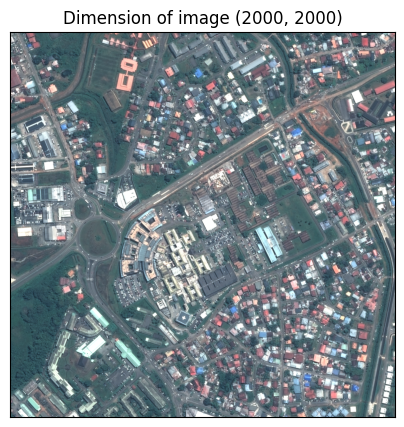

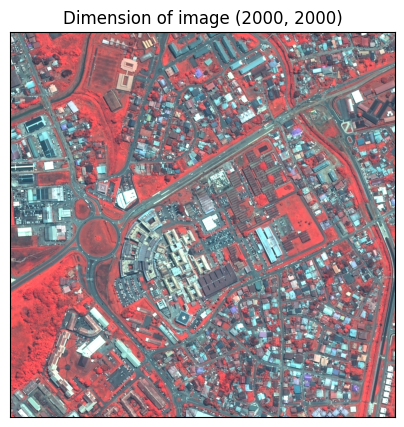

In [62]:
image.plot([0,1,2])
image.plot([3,1,2])

## Représenter la liste des images sous forme de grille (ajouter une fonction)

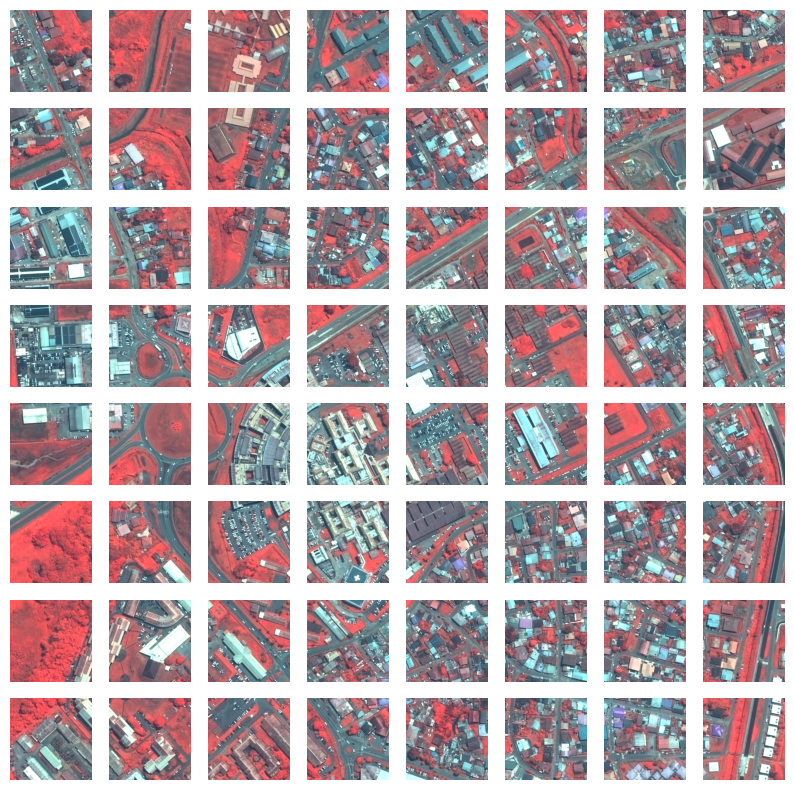

In [135]:
SatelliteImage.plot_list_satellite_images(list_images,bands_indices = [3,1,2])

In [78]:
64*256 # nb de patchs utilisables pour entrainer un modèle, why not ?

16384

In [136]:
#image.plot([0,1,2])
image.normalized 

True

## Récupération des labellisations

In [172]:
from labeler import RILLabeler

Définition d'une instance de labeller (on donneune datez et un département et on va chercher les labels associés RIL à côté)

In [173]:
labeler = RILLabeler(date, dep = "973", buffer_size= 20)

Le labeller est chargé une bonne fois pour toute donc pas de problème

In [174]:
mask = labeler.create_segmentation_label(image) # va chercher les données et rasterise les bounding box

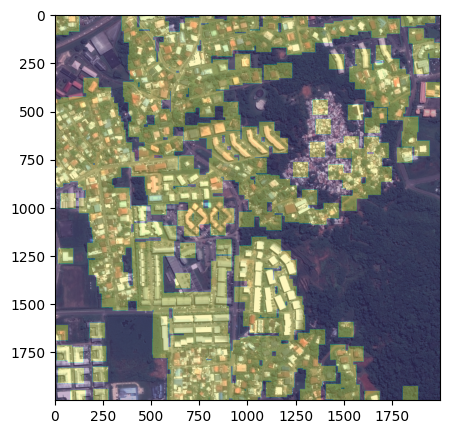

In [177]:
image.normalize
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(np.transpose(image.array_to_plot, (1, 2, 0))[:,:,:3])
ax.imshow(mask, alpha=0.3) # magnifique ! Faire une fonction  de représentation  ? # faire du découpage ? ou une fonction de sélection aléatoire d'une tuile ?

# Plus qu'à faire la même chose sur le mont baduel :)

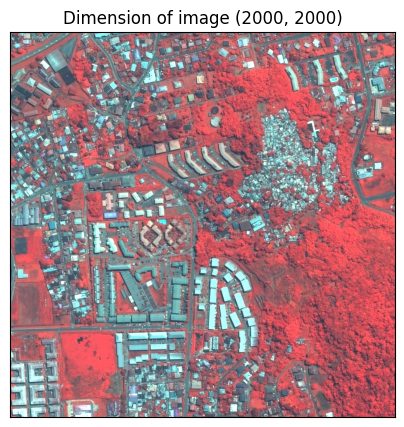

In [139]:
filename = 'Cayenne_200722/16bits/ORT_2022072050325085_U22N/ORT_2022072050325085_0354_0545_U22N_16Bits.jp2'
date = datetime.strptime(re.search(r'ORT_(\d{8})', filename).group(1), '%Y%m%d')
date

image = SatelliteImage.from_raster(
        filename,
        date = date, 
        n_bands = 4,
        dep = "973"
    )

image.plot([3,1,2])

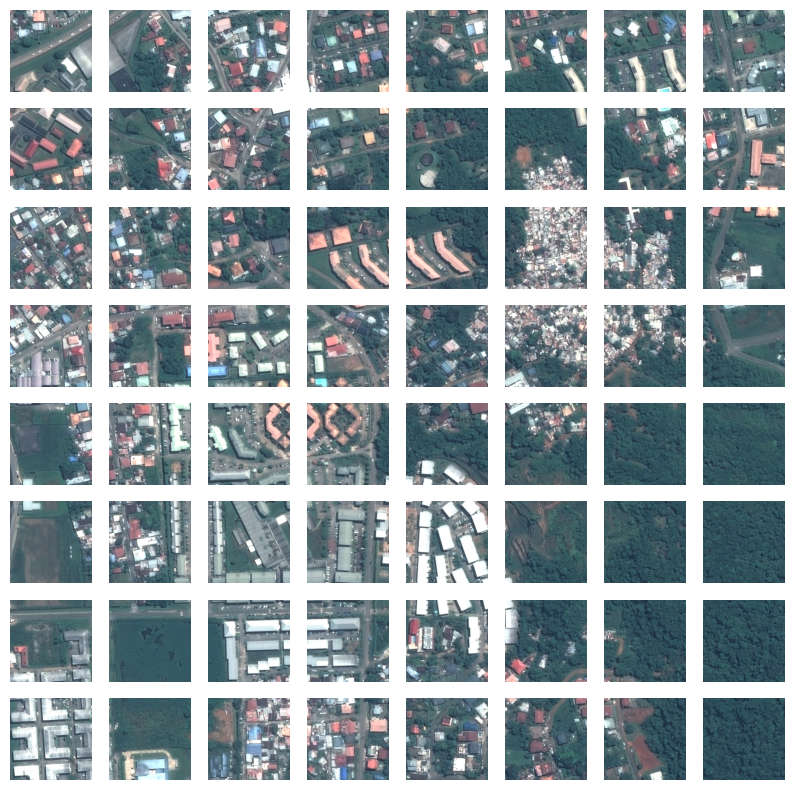

In [140]:
SatelliteImage.plot_list_satellite_images(image.split(250),[0,1,2])

## Ril

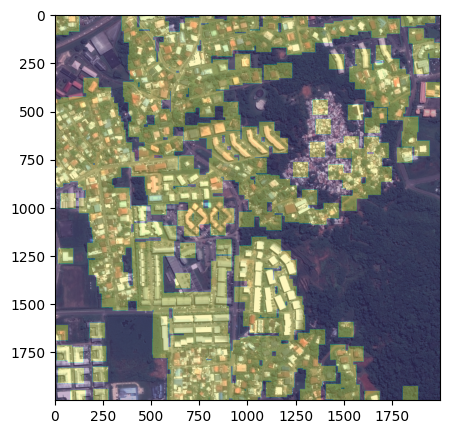

In [152]:

labeler = RILLabeler(date, dep = "973", buffer_size= 20)
mask = labeler.create_segmentation_label(image)
#image.normalize()
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(np.transpose(image.array_to_plot, (1, 2, 0))[:,:,:3])
ax.imshow(mask, alpha=0.3) # magnifique ! Faire une fonction  de représentation  ? # faire du découpage ? ou une fonction de sélection aléatoire d'une tuile ?

## BD TOPO

In [142]:
from labeler import BDTOPOLabeler

In [178]:
labeler_bdtopo = BDTOPOLabeler(date, dep = "973") # charghement lenbt nécessite d'avoir downloader la BDTOPO avant. fluidifier ça ?

In [179]:
mask = labeler_bdtopo.create_segmentation_label(image)

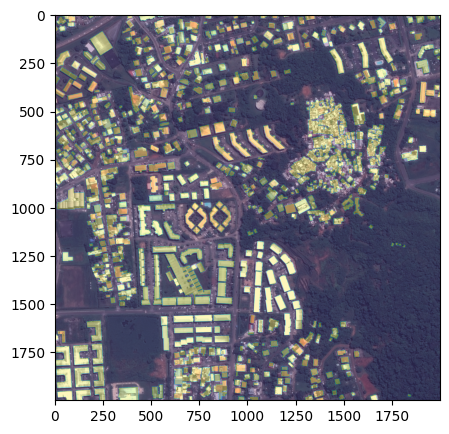

In [164]:
if image.normalize == False:
    image.normalize
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(np.transpose(image.array_to_plot, (1, 2, 0))[:,:,:3])
ax.imshow(mask, alpha=0.3) # magnifique ! Faire une fonction  de représentation  ? # faire du découpage ? ou une fonction de sélection aléatoire d'une tuile ?

Le chargement lent milite pour repréparer le jeu de données en amont une fois qu'on est fixé sur la taille avant de créer les Dataset etc..

Le moint Baduel a bien été cartographié !

## Mélange images Labels !

In [138]:
from labeled_satellite_image import SegmentationLabeledSatelliteImage

Ok ici on a des objets qui fonct cohabiter image et son label (image + segmentation mask (RIL ou BDTOPO))
On pourra faire la même chose avec la detection ou l'optique patchs etc..(il nous faut des fonctions de représentation à chaque fois) 

- de superposition image et label
- et de mise cote à cote
- possibnilité de revenir à la géométrie à chaque fois


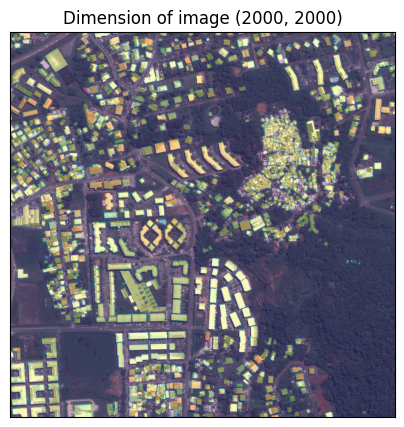

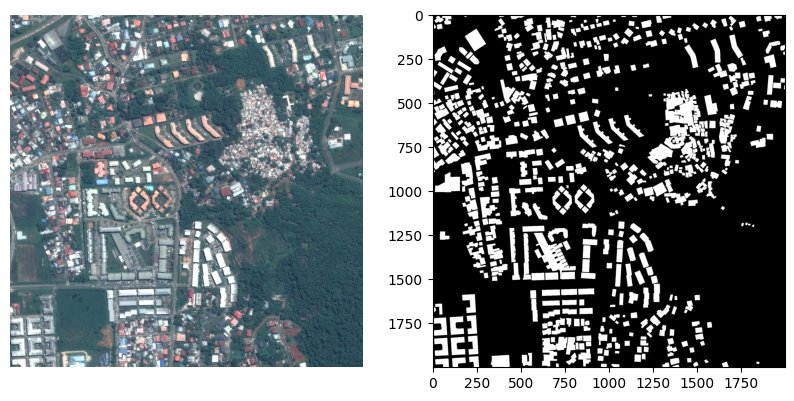

In [171]:
image_labellisee = SegmentationLabeledSatelliteImage(image,label = mask, labeling_date = date, source = "BDTOPO")

# 1) plot image et masque superposés
image_labellisee.plot([0,1,2])

# 2) plot image et masque associés côte à côte
image_labellisee.plot_label_next_to_image([0,1,2])


## fonction split

In [206]:
liste_image_labelisee = image_labellisee.split(250)

## Plot liste image labellisée 

# là je prends une liste d'image labellisée que je réordonne et :
1) je fusionne dans la même image les images 
2) je dispose les masques de la même façon ?

In [246]:
label.shape[0]

250

In [268]:
list_bounding_box = np.array([iml.satellite_image.bounds for iml in liste_image_labelisee])
list_images = np.array([iml.satellite_image for iml in liste_image_labelisee])
list_labels =  [iml.label for iml in liste_image_labelisee]

# calcul du bon ordre relativement aux coordonnées
Y = np.array([bb[0] for bb in list_bounding_box])
order_y = np.argsort(np.array(Y))
Y = Y[order_y]

list_images = list_images[order_y]
list_labels = [list_labels[i] for i in order_y]
list_bounding_box = list_bounding_box[order_y]

X = np.array([bb[3] for bb in list_bounding_box])
order = np.lexsort((Y,X))
list_images = list_images[order]
list_labels = [list_labels[i] for i in order]

n_col = len(np.unique(np.array([bb[0] for bb in list_bounding_box])))
n_row = len(np.unique(np.array([bb[3] for bb in list_bounding_box])))

mat_list_images = np.transpose(list_images.reshape(n_col,n_row))
mat_list_labels = np.transpose(np.array(list_labels).reshape(n_row,n_col,250,250),(1,0,2,3))

# Create the grid of pictures and fill it
images = np.empty((n_col,n_row), dtype = object)
labels = np.empty((n_col,n_row), dtype = object)


# Define tile size and stride
tile_size = 250
stride = 250

# Get input image dimensions
width = tile_size * n_row
height = tile_size * n_col

# Create empty output image
output_image = np.zeros((height, 2*width, 3))



for i in range(n_col):
    for j in range(n_row):
        output_image[i+:i+tile_size, j:j+tile_size, :] = np.transpose(mat_list_images[i,j].array_to_plot, (1, 2, 0))[:, :, bands_indices]
        label = mat_list_labels[i,j,:,:]
        show_mask = np.zeros((label.shape[0],label.shape[1],3))
        show_mask[label == 1, :] = [255,255,255]
        show_mask = show_mask.astype(np.uint8)
        
        output_image[i:i+tile_size+n_col, j:j+tile_size+n_col, :]  = show_mask


# Display input image, tiles, and output image as a grid
imshow(output_image)

plt.show()


ValueError: could not broadcast input array from shape (250,250,3) into shape (258,258,3)

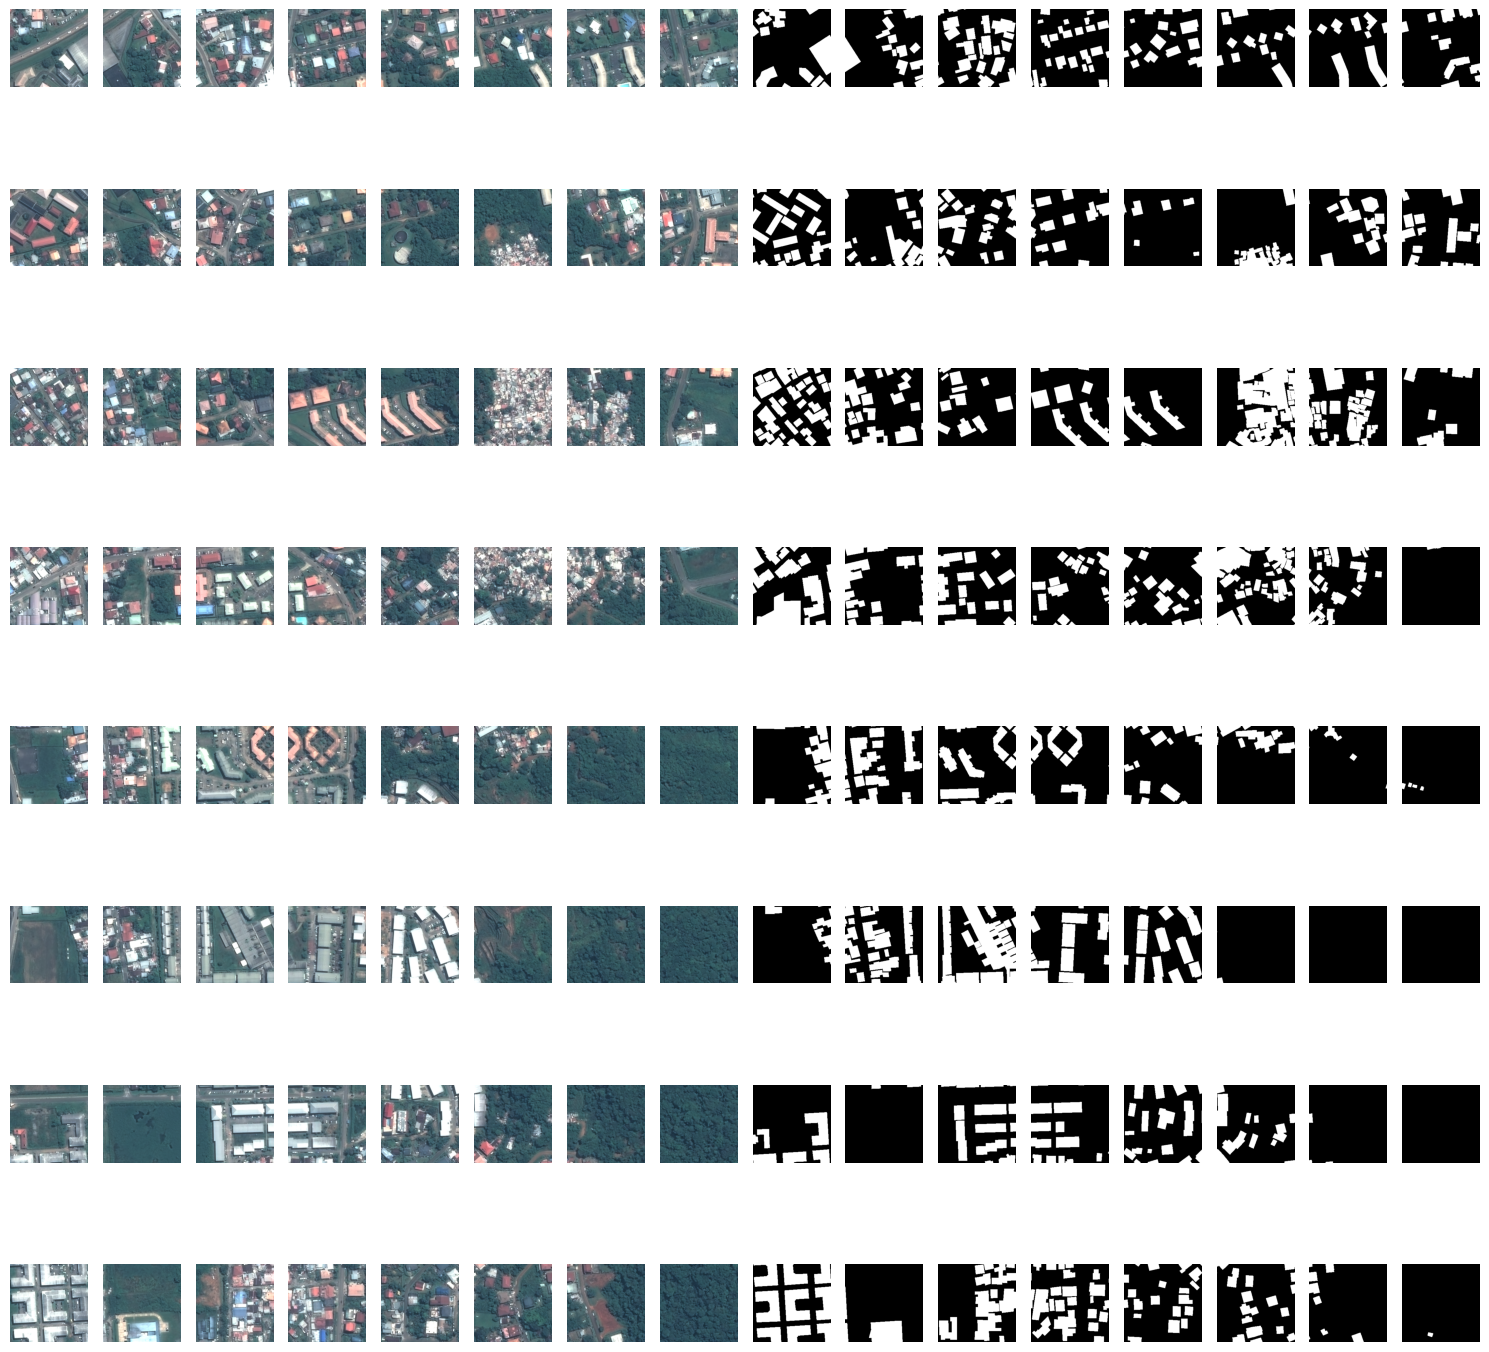

In [266]:
list_bounding_box = np.array([iml.satellite_image.bounds for iml in liste_image_labelisee])
list_images = np.array([iml.satellite_image for iml in liste_image_labelisee])
list_labels =  [iml.label for iml in liste_image_labelisee]

# calcul du bon ordre relativement aux coordonnées
Y = np.array([bb[0] for bb in list_bounding_box])
order_y = np.argsort(np.array(Y))
Y = Y[order_y]

list_images = list_images[order_y]
list_labels = [list_labels[i] for i in order_y]
list_bounding_box = list_bounding_box[order_y]

X = np.array([bb[3] for bb in list_bounding_box])
order = np.lexsort((Y,X))
list_images = list_images[order]
list_labels = [list_labels[i] for i in order]

n_col = len(np.unique(np.array([bb[0] for bb in list_bounding_box])))
n_row = len(np.unique(np.array([bb[3] for bb in list_bounding_box])))

mat_list_images = np.transpose(list_images.reshape(n_col,n_row))
mat_list_labels = np.transpose(np.array(list_labels).reshape(n_row,n_col,250,250),(1,0,2,3))

# Create the grid of pictures and fill it
images = np.empty((n_col,n_row), dtype = object)
labels = np.empty((n_col,n_row), dtype = object)


for i in range(n_col):
    for j in range(n_row):
        images[i,j] = mat_list_images[i,j].array_to_plot
        
        label = mat_list_labels[i,j,:,:]
        show_mask = np.zeros((label.shape[0],label.shape[1],3))
        show_mask[label == 1, :] = [255,255,255]
        show_mask = show_mask.astype(np.uint8)
        
        labels[i,j] = show_mask
        
images =np.flip(np.transpose(images),axis=0)
labels =np.flip(np.transpose(labels),axis=0)


# Create a figure and axes
fig, axs = plt.subplots(nrows=n_col, ncols=2*n_row, figsize=(15, 15))
fig.subplots_adjust(wspace=0.01)

# Iterate over the grid of  images and plot them
for i in range(n_col):
    for j in range(n_row):
        axs[i,j].imshow(np.transpose(images[i,j], (1, 2, 0))[:, :, bands_indices])

for i in range(n_col):
    for j in range(n_row):
        axs[i,j+n_col].imshow(labels[i,j])


# Remove any unused axes
for i in range(n_col):
    for j in range(n_row):
        axs[i,j].set_axis_off()
        axs[i,j+n_col].set_axis_off()

fig.tight_layout()
# Show the plot
plt.show()

## Plot les masques de détection

## TO DO 

- création d'une classe Dataset particulière 
- comment créer un DataSet à partir des images originales ? utiliser des fonctions split successives, stacker etc..mais on ne va pas tout garder en mémoire.. création de nouveaux fichiers image ? ou bien technique 2 splitter et sélectionner aléatoirement une ou plusieur zones dans l'image ? -> voir avec les gars
- ajout de fonctions de représentations
- comment utiliser des fonctions plot déjà codées ?
- Faire une fonction create bounding box pour yolo etc.. c'est l'objet de create detection label , faire une fonction de représentation ?
- access Vault ?
- Faire un notebook de prise en main pour les stagiaires -> en cours
- faire une fonction plot label on images (superposition)
- faire une fonction plot label next to image
- faire une fonction plot liste image -> done
- fair eune fonction plot list of label images
- faire une fonction qui a partir d'un masque de segmentation donné sors les polygones associés (revenir sur rasterio ?)
- Pour les datasets, les classes faire une classe généralsite Dataset Segmentation et détection et patchs
- et faire plusieurs types de dataset segmentation dépendant du jeu de données et la stratégie de chargement
- ppour les modèles il faudra faire une surclasse modeles segment ation/detection et créer des modèlmes ad hoc etc.. De telle sorte qu'un modèle de segmentation puisse s'appliquer sans douleur sur un dataset de segmentation